Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
# Your name here
NAME = "Ian McGregor"

In [2]:
## Adding a check for version
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

## Problem 1:  Program Gradient-Based Learning for  Single Layer Perceptron Classifier.

We will first program a single layer perceptron classifier, which has the following structure:

<img src="assignment8-nn-pic-1.png" style="width:600px;height:300px;">

The inputs are $x_1, \cdots, x_n$, which are real numbers. The function computed by the network overall is
$$\hat{y = f( w_1 x_1 + \ldots + w_n x_n)\,,$$ 

wherein $f$ is called an "activation function". Since
we are doing classification, it is desirable to have an output that is either a $0$ or $1$. We will 
use the sigmoid function $$f (z) = \frac{1}{1 + e^{- z}}$$

Note that a sigmoid function is naturally between $0$ and $1$ for all $z$. Furthermore, as $z \rightarrow -\infty$, $f(z) \rightarrow 0$ whereas as $z \rightarrow + \infty$, we have $f(z) \rightarrow 1$.

Note that its derivative is: $f'(z) = f(z) (1- f(z))$

<img src="text.png" style="width:900px;height:450px;">


The gradient descent algorithm will modify the weights $w_1, \ldots, w_n$ as follows: 

- Compute the gradient

$$\nabla L = \left(\frac{\partial L}{\partial w_1}, \ldots, \frac{\partial L}{\partial w_n} \right)\,.$$

- Update the vector of weights using the gradient: 
$$ (w_1', \ldots, w_n') := (w_1, \ldots, w_n) - \alpha \left(\nabla L\right) \,.$$
Here $\alpha$ is a small number that we set called the _learning rate_.

- We terminate the gradient descent when (a) the norm of the gradient is too small, or (b) the loss is small enough or (c) the number of iterations exceeds a given bound.

## Gradient Descent for a Single Layer Perceptron
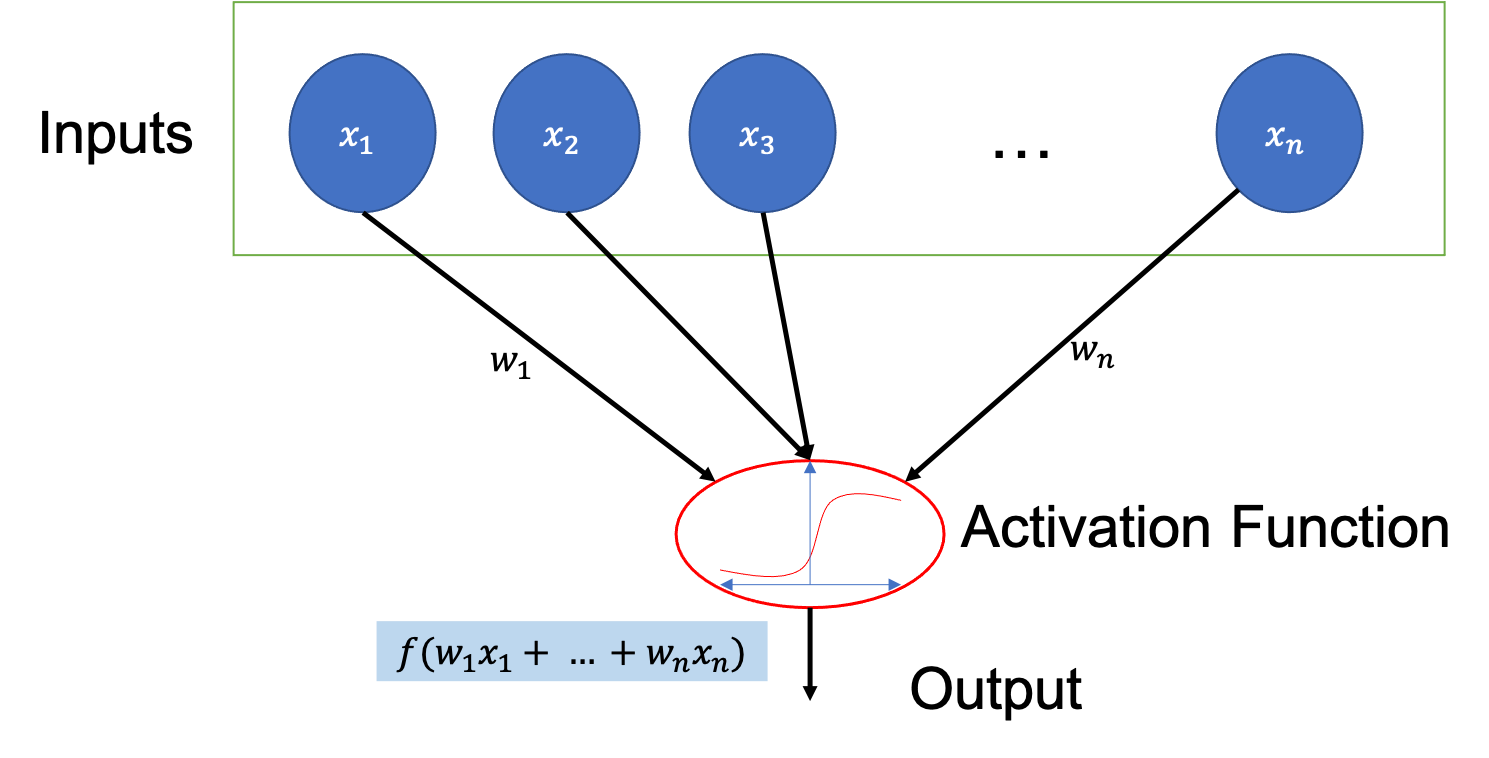

## Part (A), 10 points
Derive closed form expressions for the gradient:  $\frac{\partial L}{\partial w_i}$. Please use latex to express your answer. We will have credit for nicely presented answers that show the intermediate steps. Detailed explanations are not needed.

Expected size: 5 lines maximum.

 $
 z = w_1 x_1 + \ldots + w_n x_n\\
 y_j = f(z_j)\\
 L = \sum_{j=1}^N(\hat{y}_j - y_j)^2\\
 f'(z) = f(z) (1- f(z)) \cdot \frac{\partial}{\partial w_i} z\\
 \frac{\partial L}{\partial w_i} = \sum_{i=1}^N 2(y - \hat{y}) \cdot y(1 - y) \cdot x_i\\
 $

## Complete Missing Code  For Functions 

 - `eval_network`
 - `eval_gradient_for_single_row`
 - `eval_loss_gradient`
 - `eval_loss`
 - `single_step_weights_update`

In [3]:
import math
import numpy as np

def sigmoid(z):
    return 1/(1 + math.exp(-z))

def norm(lst_vec):
    return sum([x*x for x in lst_vec])

def add_vectors(lst_vec1, lst_vec2):
    return [x1 + x2 for (x1, x2) in zip(lst_vec1, lst_vec2)]

def scale_vector(lst_vec, scale): 
    return [scale * x for x in lst_vec]


class SingleLayerPerceptron:
    def __init__(self, init_weights_list): 
        self.n = len(init_weights_list)
        self.cur_weights = init_weights_list
    
    # Function: eval_network
    # Return f(z)
    def eval_network(self, inp_data):
        assert(len(inp_data) == self.n)
        return sigmoid(np.dot(inp_data, self.cur_weights))
    
    # Function: eval_gradient_for_single_row
    # Evaluate the gradient of loss function for a single input row.
    # rowj is the input data that is a list of size self.n
    # yhatj is the correponding classification that is either a 0 or a 1.
    # Return a list whose size is self.n and has a list of the gradient of the loss function
    # with respect to w1,..., wn. 
    def eval_gradient_for_single_row(self, rowj, yhatj):
        gradient = [0] * self.n
        y = self.eval_network(rowj)
        for i in range(len(rowj)):
            x_i = rowj[i]
            gradient[i] = 2 * (y - yhatj) * y * (1 - y) * x_i
        return gradient
    
    # Evaluate the gradient of the loss function w.r.t to training data.
    # Repeatedly call the function eval_gradient for a single row.
    # Add the gradients from each row together to get the total gradient
    # for the entire training data.
    # Input: Training Data is a 
    #  list of lists, wherein each 
    # list element corresponds to a row of the training data
    # The first self.n elements of the row are inputs and 
    # the last element is the output.
    # Example:
    # Inputs: x1, x2, x3, Output: y
    # [[0, -1, 2, 0], 
    #  [1, 2, -0.5, 1], 
    #  [2, 1, -2.35, 0], 
    #  [-0.5, -.5, -.25, 1]]
    # The training data above has 4 rows.
    # row 1 has inputs x1=0, x2=-1, x3=2 and output y = 0
    # Likewise, row 4 has input x1 = -0.5, x2 = -0.5, x3= -0.25, 
    # and output y = 1
    
    def eval_loss_gradient(self, train_data):
        gradient = [0] * self.n
        for i in range(len(train_data)):
            rowj = train_data[i][:self.n]
            yhatj = train_data[i][-1]
            new_grad = self.eval_gradient_for_single_row(rowj, yhatj)
            gradient = [ gradient[j] + new_grad[j] for j in range(len(new_grad)) ]
        return gradient
    #Function: eval_loss 
    # Evaluate total loss function given training data
    # Use the function eval_network to calculate the output
    # of the network for each individual row in the training data.
    # Input: 
    # A list of lists wherein each 
    # list element corresponds to a row of the training data
    # The first self.n elements of the row are inputs and 
    # the last element is the output.
    # Example:
    # Inputs: x1, x2, x3, Output: y
    # [[0, -1, 2, 0], 
    #  [1, 2, -0.5, 1], 
    #  [2, 1, -2.35, 0], 
    #  [-0.5, -.5, -.25, 1]]
    # The training data above has 4 rows.
    # row 1 has inputs x1=0, x2=-1, x3=2 and output y = 0
    # Likewise, row 4 has input x1 = -0.5, x2 = -0.5, x3= -0.25, 
    # and output y = 1
    def eval_loss(self, train_data):
        loss = 0
        for i in range(len(train_data)):
            rowj = train_data[i][:self.n]
            yhatj = train_data[i][-1]
            loss = loss + (yhatj - self.eval_network(rowj))**2
        return loss
    #Function: single_step_weights_update
    # Update current weights based on current grad and learning
    # rate provided as inputs.
    # self.cur_weights = self.cur_weights - learn_rate * cur_grad
    # Be careful since we are using lists instead of vectors and
    # operators like - and * are not overloaded for lists.
    # Returns nothing -- self.cur_weights should be updated as a side-effect.
    def single_step_weights_update(self, cur_grad, learn_rate):
        for i in range(len(self.cur_weights)):
            self.cur_weights[i] = self.cur_weights[i] - (learn_rate * cur_grad[i])
    
    #Function: train_network
    # Input: test_data is a list of lists.
    # each element of train_data is a list with n+1 entries. 
    # The first n entries are the inputs and the very last entry is the output classification (0/1)
    def train_network(self, train_data, learn_rate):
        cur_loss = self.eval_loss(train_data)
        cur_grad = self.eval_loss_gradient(train_data)
        print(f'Initial loss: {cur_loss}, gradient: {norm(cur_grad)}')
        num_iter = 0
        while (cur_loss > 0.001 and norm(cur_grad) > 1e-6 and num_iter < 1000):
            self.single_step_weights_update(cur_grad, learn_rate)
            cur_loss = self.eval_loss(train_data)
            cur_grad = self.eval_loss_gradient(train_data)
            if num_iter % 25 == 0:
                print(f'{num_iter}: current loss: {cur_loss} with norm of gradient: {norm(cur_grad)}')
            num_iter = num_iter + 1
        return 

In [4]:
## Test training data
## Three inputs and one output.
train_data = [
    [1, 2, -1, 0],
    [0, 1, 1, 1],
    [-1, 2, -3, 0],
    [0, 3, 2, 0],
    [-1, 1, -2, 1],
    [1, -2, 2, 0],
    [-1, 2, 3, 1],
    [3, 1, 2, 0],
    [4, 3, -2, 0],
    [0, 3, -5, 0]
]


In [5]:
# 1. Test evaluation of loss function
slp = SingleLayerPerceptron([0]*3)
l0 = slp.eval_loss( [[1, 2, -1, 1]])
assert(l0 == 1/4), f"A: Test failed - your code computed loss = {l0}, expected = 1/4"
l1 = slp.eval_loss([[1,2, 0, 0],[2,1,2,0],[1,-2,2,0],[0,1,1,1]])
assert(l1 == 1), f'B: Test failed - your code computed loss = {l1}, expected = 1.0'
slp.cur_weights=[1,1,1]
l2 = slp.eval_loss([[1, 1, 1, 0]])
assert (l2 == (sigmoid(3) - 0)**2), f'C: Test failed - your code computed loss = {l2}, expected = {(sigmoid(3) -0)**2}'
l3 = slp.eval_loss([[1, 1, 1, 0],[1,-1,0,1]])
assert (l3 == (sigmoid(3) - 0)**2 + (sigmoid(0)-1)**2), f'D: Test failed - your code computed loss = {l3}, expected = {(sigmoid(3) - 0)**2 + (sigmoid(0)-1)**2}'

# 2. Test derivative of each row
slp.cur_weights=[1,1,1]
g0 = slp.eval_gradient_for_single_row([-1,0,1],0)
out0 = 1/2
sigmoid_der0 = 1/4
der_expected = [-1/4, 0, 1/4]
assert(g0 == der_expected), f'E: eval_gradient_for_single_row failed: your code {g0}, expected: {der_expected}'
slp.cur_weights=[1,-2,-1]
g1 = slp.eval_gradient_for_single_row([-1, 0.5, -1], 1)
z1 = -1
l1 = sigmoid(-1) -1
l2 = 2*l1 * (sigmoid(-1))*(1-sigmoid(-1))
der_expected2 = [l2 * -1, l2 * 0.5, l2 * -1]
assert(g1 == der_expected2), f'F: eval_gradient_for_single_row failed: your code {g1}, expected: {der_expected2}'

# 3. Test gradient of loss function over all rows
slp.cur_weights=[1,0,-1]
train_data=[[-1,0,1,0],[1,0,0,1],[0,0,-1,0]]

g2 = slp.eval_loss_gradient(train_data)
g21 = slp.eval_gradient_for_single_row([-1,0,1],0)
g22 = slp.eval_gradient_for_single_row([1,0,0],1)
g23 = slp.eval_gradient_for_single_row([0,0,-1],0)

assert(g2 == [g21[0]+g22[0]+g23[0],g21[1]+g22[1]+g23[1],g21[2]+g22[2]+g23[2] ]), f'G: evaluate gradient for entire training data set must be sum of gradients for each row. FAILED.'

# 4. Test one step update of the weights of the NN
slp.single_step_weights_update(g2, 0.2)
print(slp.cur_weights)
assert abs(slp.cur_weights[0] - 1.02615705) <= 1E-4, 'H: Current weight update failed.'
assert abs(slp.cur_weights[1]) <= 1E-4, 'I: Current weight update failed.'
assert abs(slp.cur_weights[2] + 0.94751228) <= 1E-4, 'J: Current weight update failed.'

[1.0261570539831775, 0.0, -0.9475122806865847]


In [6]:
print('Lets test the training on given data')
slp = SingleLayerPerceptron([0]*3)
slp.train_network(train_data,0.5)

Lets test the training on given data
Initial loss: 0.75, gradient: 0.25
0: current loss: 0.6333788327532072 with norm of gradient: 0.18699522805651914
25: current loss: 0.12557421694543625 with norm of gradient: 0.008432693854328481
50: current loss: 0.06663014391675948 with norm of gradient: 0.0025572563611752416
75: current loss: 0.04454313310268188 with norm of gradient: 0.0011985758987597174
100: current loss: 0.03313688955162678 with norm of gradient: 0.0006856745100860637
125: current loss: 0.02623356370110518 with norm of gradient: 0.00044036812738692946
150: current loss: 0.02163277625964575 with norm of gradient: 0.00030514066178200156
175: current loss: 0.018360044805779897 with norm of gradient: 0.00022312246854756356
200: current loss: 0.015919668158762855 with norm of gradient: 0.00016982703477676247
225: current loss: 0.01403380481640815 with norm of gradient: 0.00013334079567386503
250: current loss: 0.012535075857540635 with norm of gradient: 0.00010731920008472812
275:

## Problem 2: Federalist Papers Authorship Attribution

The Federalist Papers are a collection of  85 articles and essays written by Alexander Hamilton, James Madison, and John Jay to argue for the adoption of the US constition.
We have collected each of these 85 chapters where chapter number n is in a file named `chapter_n.txt` where you can substitute the number `n`.

We will implement the following process:
  1. Collect and process each file to yield features -- features must be a vector of numbers. The key is to translate documents into such vectors.
  2. Learn single layer perceptron classifiers that classify whether a particular document is authored by Hamilton (1 for Hamilton vs 0 for non-Hamilton authored document). 
  3. Analyze how accurate your classifier is over the training and test data.
  4. Briefly reflect on why we obtain the results.

## Part A: Preprocess the documents.

In [7]:
# We will get rid of common nouns, verbs, articles and prepositions.
words_to_eliminate = ['and', 'in', 'a',',','the','of','or','it','is',
                      'was','he','she','they','publius','an','this','that','from',
                      'to','at','by','or','we','have','because','on','in',
                      'for','his','hers','be','will','as','has','all','are','their','its',
                     'who','those','there','would','upon','which','but','such', 'only','i','you',
                     'them','these','theirs','than','though','might','how','been','new','york',
                      'into','yet','if','any','may','does','not','can','so','always',
                      'did','were','with','had','were','could']
# why did we get rid of publius??? Who is publius?

# publius was a pseudoname for the writers of the federalist papers, used with the interpretation "friend of the people"
# this was done to protect the identities of the writers

#To avoid punctuations is important since we do not need them and they will confound
# our analysis.
punctuations = [',','.',':',';','(',')','?','\"']

#Process text files and extract words
def convert_chapter_to_word_sequence(chapter_num, common_words, punctuations):
    filename = f'chapter_{chapter_num}.txt'
    file = open(filename,'r')
    words = []
    # read the file line by line
    for line in file:
        line = line.strip()
        # remove all punctuations
        for p in punctuations:
            line = line.replace(p,'')
        #split line into words
        lwords = line.split()
        #make all words lowercase 
        lwords = [elt.lower() for elt in lwords]
        #get rid of the common words
        lwords = [elt for elt in lwords if elt not in common_words]
        #append to a list
        words += lwords
    file.close()
    #return the list of words in the document after all the processing.
    return words

In [8]:
# Let us test it on chapter number 20 to see what we get
words20 = convert_chapter_to_word_sequence(20, words_to_eliminate, punctuations)
print(f'Chapter 20 word list = {words20}')

Chapter 20 word list = ['same', 'subject', 'continued', 'insufficiency', 'present', 'confederation', 'preserve', 'union', 'packet', 'tuesday', 'december', '11', '1787', 'people', 'state', 'united', 'netherlands', 'confederacy', 'republics', 'rather', 'aristocracies', 'very', 'remarkable', 'texture', 'confirming', 'lessons', 'derived', 'already', 'reviewed', 'union', 'composed', 'seven', 'coequal', 'sovereign', 'states', 'each', 'state', 'province', 'composition', 'equal', 'independent', 'cities', 'important', 'cases', 'provinces', 'cities', 'must', 'unanimous', 'sovereignty', 'union', 'represented', 'states-general', 'consisting', 'usually', 'about', 'fifty', 'deputies', 'appointed', 'provinces', 'hold', 'seats', 'some', 'life', 'some', 'six', 'three', 'one', 'years', 'two', 'provinces', 'continue', 'appointment', 'during', 'pleasure', 'states-general', 'authority', 'enter', 'treaties', 'alliances', 'make', 'war', 'peace', 'raise', 'armies', 'equip', 'fleets', 'ascertain', 'quotas', 'd

In [9]:
# Collect a "global" vocabulary across all documents
def collect_full_vocabulary():
    all_words = {}
    # for each chapter of the federalist papers
    for chapter_id in range(1,86):
        #get the wordsd
        chapterwords = convert_chapter_to_word_sequence(chapter_id, words_to_eliminate, punctuations)
        #compute frequency of the words in a dictuionary
        for w in chapterwords:
            if w in all_words:
                all_words[w] = all_words[w] + 1
            else:
                all_words[w] = 1
    #select only those words that occur more than 25 times across all documents
    frequent_enough_words = set()
    for (w, count) in all_words.items():
        if count > 25:
            frequent_enough_words.add(w)
    return frequent_enough_words
#Call the set of wordsd of "full vocabulary"
full_vocabulary = collect_full_vocabulary()
print(full_vocabulary)
print(len(full_vocabulary))

{'thought', 'properly', 'left', 'absolute', 'said', 'rulers', 'end', 'relation', 'argument', 'assembly', 'measure', 'reasons', 'being', 'sole', 'policy', 'make', 'wealth', 'brought', 'objection', 'happiness', 'requires', 'hand', 'governments', 'means', 'treaties', 'given', 'treaty', 'bear', 'hold', 'number', 'interests', 'rest', 'private', 'europe', 'proposed', 'many', 'except', 'respective', 'branches', 'massachusetts', 'certainly', 'magistrate', 'even', 'supposition', 'provided', 'derived', 'constitutional', 'occasion', 'merely', 'disposition', 'legislatures', 'opinions', 'nation', 'fundamental', 'peace', 'history', 'independence', 'till', 'expense', 'intended', 'known', 'particular', 'rule', 'people', 'life', 'trial', 'partial', 'throughout', 'danger', 'existing', 'execution', 'seems', 'already', 'thousand', 'interest', 'consequently', 'states', 'propriety', 'calculated', 'limits', 'confederacy', 'credit', 'great', 'rights', 'difficulty', 'constituents', 'regulate', 'sovereign', 'co

In [10]:
# Here is the ground truth data
# 'H' is for Hamilton
# 'J' is for Jay
# 'M' for madison
# Some of the co-authored documents are also shown but we will
# not use them in this problem.
federalist_papers_authorship_ground_truth = [
   (1, 'H'),(2, 'J'),(3, 'J'),(4, 'J'),(5, 'J'),
(6, 'H'),(7, 'H'),(8, 'H'),(9, 'H'),(10, 'M'),
(11, 'H'),(12, 'H'),(13, 'H'),(14, 'M'),(15, 'H'),
(16, 'H'),(17, 'H'),(18, 'M+H'),(19, 'M+H'),(20, 'M+H'),
(21, 'H'),(22, 'H'),(23, 'H'),(24, 'H'),(25, 'H'),
(26, 'H'),(27, 'H'),(28, 'H'),(29, 'H'),(30, 'H'),
(31, 'H'),(32, 'H'),(33, 'H'),(34, 'H'),(35, 'H'),
(36, 'H'),(37, 'M'),(38, 'M'),(39, 'M'),(40, 'M'),
(41, 'M'),(42, 'M'),(43, 'M'),(44, 'M'),(45, 'M'),
(46, 'M'),(47, 'M'),(48, 'M'),(49, 'M'),(50, 'M'),
(51, 'M'),(52, 'M'),(53, 'M'),(54, 'M'),(55, 'M'),
(56, 'M'),(57, 'M'),(58, 'M'),(59, 'H'),(60, 'H'),
(61, 'H'),(62, 'M'),(63, 'M'),(64, 'J'),(65, 'H'),
(66, 'H'),(67, 'H'),(68, 'H'),(69, 'H'),(70, 'H'),
(71, 'H'),(72, 'H'),(73, 'H'),(74, 'H'),(75, 'H'),
(76, 'H'),(77, 'H'),(78, 'H'),(79, 'H'),(80, 'H'),
(81, 'H'),(82, 'H'),(83, 'H'),(84, 'H'),(85, 'H')
]

## Part (B)  Extract a feature vector from words

We have provided helpful data for you to preprocess the chapter's text files.
Write a function `get_feature_vector_from_chapter` that extracts some useful features to be used in machine learning. A simple idea could be to extract the frequency of words appearing the full vocabulary.

First describe your idea for extracting features. Features can include counts of certain words, counts of bi-grams (two pairs of words that occur in sequence in a document).

Please ensure that you have no more than 5000 features overall. I.e, each document is featurized into a vector of no more than 5000 numbers.

First Feature Extraction Technique:

    Since the full vocabulary of the entire document consists of 719 distinct words, this could serve as a good place to start. 
    I will start by counting the number of times each word is used, and see if there are strong enough distinctions in each of the writers styles to make predictions. 
    
Result:

Next, program your feature extraction idea.

In [11]:
def get_feature_vector_from_chapter(chapter_num, vocabulary=full_vocabulary, common_words=words_to_eliminate, punctuations=punctuations):
    # features vector, initialized to 0's for each distinct word in vocabulary
    features = []
    words = list(convert_chapter_to_word_sequence(chapter_num, common_words, punctuations))
    for word in full_vocabulary:
        features.append(words.count(word))
    return features

In [12]:
for chap_id in range(1, 86):
    feat1 = get_feature_vector_from_chapter(chap_id)
    assert type(feat1) is list , 'Features must be list'
    for elt in feat1:
        assert type(elt) is float or type(elt) is int, 'elements must be float or int'
    assert len(feat1) <= 5000
print('Features seem to be of the right type! -- passed!')
print('Warning: we do not check the correctness of your implementation, however.')

Features seem to be of the right type! -- passed!


In [13]:
## Let us prepare some training data for those papers authored by hamilton.

hamilton_test_data = [
    (1, 1),(2, 0),(3, 0),(4, 0),
    (6, 1), (8, 1),(9, 1),(10, 0),
    (13, 1),(14, 1),(15, 1),(29, 1),(30, 1),
    (31, 1),(32, 1),(33, 1),
    (28, 1),(37, 0),(38, 0),(39, 0),(40, 0),
    (41, 0),(42, 0),(43, 0),(44, 0),(45, 0),
    (63, 0),(64, 0),(65, 1),
    (66, 1),(68, 1),(74, 1),(75, 1),
    (84, 1),(85, 1),(50, 0),(60, 1),
    (51, 0),(52, 0)
]

hamilton_training_data = [
(5, 0), (7, 1),
(11, 1),(12, 1),
(16, 1),(17, 1),
(21, 1),(22, 1),(23, 1),(24, 1),(25, 1),
(26, 1),(27, 1),(34, 1),(35, 1),
(36, 1),
(46, 0),(47, 0),(48, 0),(49, 0),(53, 0),(54, 0),(55, 0),
(56, 0),(57, 0),(58, 0),(59, 1),
(61, 1),(62, 0),
(67, 1),(69, 1),(70, 1),
(71, 1),(72, 1),(73, 1),
(76, 1),(77, 1),(78, 1),(79, 1),(80, 1),
(81, 1),(82, 1),(83, 1)
]

We prepare and run the single layer perceptron training for our data set.

In [14]:
from random import random
def prepare_training_data (train_data):
    training_data_features = []
    for (ch_id, cls) in train_data:
        print(f'Chapter: {ch_id}, Authored by Hamilton? {cls}')
        xdata = get_feature_vector_from_chapter(ch_id)
        xdata.append(1.0) # append a special input that is always 1 for the affine term
        xdata.append(cls) # append the class
        training_data_features.append(xdata)
    return training_data_features

def train_classifier(train_data):
    n = len(train_data[0])-1
    slp = SingleLayerPerceptron([0.1*random()-0.05 for i in range(n)])
    slp.train_network(train_data, 0.001)
    return slp


In [15]:
# Let us train the classifier
hamilton_classifier_data = prepare_training_data(hamilton_training_data)
hamilton_classifier_nn = train_classifier(hamilton_classifier_data)

Chapter: 5, Authored by Hamilton? 0
Chapter: 7, Authored by Hamilton? 1
Chapter: 11, Authored by Hamilton? 1
Chapter: 12, Authored by Hamilton? 1
Chapter: 16, Authored by Hamilton? 1
Chapter: 17, Authored by Hamilton? 1
Chapter: 21, Authored by Hamilton? 1
Chapter: 22, Authored by Hamilton? 1
Chapter: 23, Authored by Hamilton? 1
Chapter: 24, Authored by Hamilton? 1
Chapter: 25, Authored by Hamilton? 1
Chapter: 26, Authored by Hamilton? 1
Chapter: 27, Authored by Hamilton? 1
Chapter: 34, Authored by Hamilton? 1
Chapter: 35, Authored by Hamilton? 1
Chapter: 36, Authored by Hamilton? 1
Chapter: 46, Authored by Hamilton? 0
Chapter: 47, Authored by Hamilton? 0
Chapter: 48, Authored by Hamilton? 0
Chapter: 49, Authored by Hamilton? 0
Chapter: 53, Authored by Hamilton? 0
Chapter: 54, Authored by Hamilton? 0
Chapter: 55, Authored by Hamilton? 0
Chapter: 56, Authored by Hamilton? 0
Chapter: 57, Authored by Hamilton? 0
Chapter: 58, Authored by Hamilton? 0
Chapter: 59, Authored by Hamilton? 1
Cha

In [16]:
def interpret_probability(p):
    if (p >= 0.99):
        return 'YES with extremely high confidence'
    elif (p >= 0.9):
        return 'YES with high confidence'
    elif (p >= 0.8):
        return 'Highly Likely'
    elif (p >= 0.7):
        return 'Likely'
    elif p >= 0.55:
        return 'maybe yes'
    elif p >= 0.45:
        return 'unsure'
    elif (p >= 0.3):
        return 'maybe no'
    elif (p >= 0.2):
        return 'Unlikely'
    elif (p >= 0.1):
        return ('Quite unlikely')
    elif (p >= 0.01):
        return ('NO with high confidence')
    else: 
        return ('NO with extremely high confidence')
    
def evaluate_classifier_error(slp, test_data):
    num_correct = 0
    for (ch_id, cls) in test_data:
        print(f"\t Chapter {ch_id}, written by Hamilton? {'yes' if cls == 1 else 'no'}")
        xdata = get_feature_vector_from_chapter(ch_id)
        xdata.append(1.0) # append a special input that is always 1 for the affine term
        network_classification = slp.eval_network(xdata)
        network_binarized_classification = 1 if network_classification >= 0.5 else 0
        print(f'\t Network output:  {interpret_probability(network_classification)}({network_classification})')
        num_correct = num_correct + (1 if (cls == network_binarized_classification) else 0)
    print(f'\t Number of correct answers: {num_correct} out of {len(test_data)} tests.')

print('Evaluating Classifier on Training Data:')
evaluate_classifier_error(hamilton_classifier_nn, hamilton_training_data)
print('---------------------------------')
print('Evaluating Classifier on Previously Unseen Data:')
evaluate_classifier_error(hamilton_classifier_nn, hamilton_test_data)

Evaluating Classifier on Training Data:
	 Chapter 5, written by Hamilton? no
	 Network output:  NO with high confidence(0.02024627209080984)
	 Chapter 7, written by Hamilton? yes
	 Network output:  YES with high confidence(0.9883547488228842)
	 Chapter 11, written by Hamilton? yes
	 Network output:  YES with high confidence(0.9899768835996292)
	 Chapter 12, written by Hamilton? yes
	 Network output:  YES with extremely high confidence(0.9909306509742793)
	 Chapter 16, written by Hamilton? yes
	 Network output:  YES with extremely high confidence(0.996236413221031)
	 Chapter 17, written by Hamilton? yes
	 Network output:  YES with high confidence(0.9845876111468059)
	 Chapter 21, written by Hamilton? yes
	 Network output:  YES with extremely high confidence(0.9921080681132696)
	 Chapter 22, written by Hamilton? yes
	 Network output:  YES with extremely high confidence(0.9956386985606122)
	 Chapter 23, written by Hamilton? yes
	 Network output:  YES with high confidence(0.988230795403334

Interpret the results on training and test data. 
  - How does your classifier perform over the training data? 
  - How does it perform on the previously unseen test data? 
  - How much better is the classifier than a random guess on the unseen test data?
  - What can you say about over-fitting ? 
  - If you conclude that your classifer overfits the data, explain why this could be happening?

- My classifier performs at 100% accuracy over the training data which is great!
- On the previously unseen data it correctly classifies the author about 72% of the time which is ok... in student terms I have coded a C- student which is relatively abysmal. 
- My implementation is most definitely better than a random guess, as we know, with binary decisions as the number of decisions grows the random decision will be correct about 50% of the time. 
- Since our loss values are not extreme, nor requiring an unreasonable time to calculate and we are nowhere near an acceptable threshold for correct guesses I would say confidently that we are not overfitting. 

### For Further Exploration 

Single layer perceptron weights are easy to interpret and make sense of. You can look at the feature weights and take the top 20 features in terms of their weights or the bottom 20 features in terms of their weights. What are the top 20 and bottom 20 features that your classifier finds? What do they tell us about Hamilton? Write a little more code to find out.

In [17]:
# This works for the instructor's model solution.
# It may not work for yours.
# so please copy and modify according to your features.
weights_and_words = sorted(zip(hamilton_classifier_nn.cur_weights,full_vocabulary))
print('Top twenty features associated with Hamilton\'s writings:')
for (weight, word) in reversed(weights_and_words[-20:]):
    print(f'{word} -- {weight}')
print('')
print('Top twenty features associated with Madison\'s (or Jay\'s) writings:')
for (weight, word) in weights_and_words[:20]:
    print(f'{word} -- {weight}')

Top twenty features associated with Hamilton's writings:
power -- 0.14345502567220877
national -- 0.11317024636146714
community -- 0.09894142059621812
probability -- 0.07932557230898064
courts -- 0.0781970706385922
system -- 0.07610213304561016
duty -- 0.07545884015228078
union -- 0.07511973216762415
less -- 0.07488020578830129
justice -- 0.07348497662415715
kind -- 0.07303776054914622
opposition -- 0.06972065648441741
united -- 0.06930350140001552
execution -- 0.06905882551538231
privileges -- 0.06805576505159157
too -- 0.06802577382192235
regard -- 0.06699099955709167
situation -- 0.06689971568887569
jurisdiction -- 0.06684041780547771
shall -- 0.06618483065377692

Top twenty features associated with Madison's (or Jay's) writings:
representatives -- -0.10583682501939441
number -- -0.09527138119859557
federal -- -0.09318921494238273
departments -- -0.08747241880467531
representative -- -0.08720605976144974
nations -- -0.08063167899309631
secure -- -0.07639033364931214
people -- -0.072

## That's all folks